<a href="https://colab.research.google.com/github/aselya9185/data_analysis/blob/pulmonary_nodules_classification/DA_Project_Volume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/MyDrive/RICSE_DataAnalytics"

 0_DA_Project_v2.ipynb	     ExtractedFeatures_slices2.csv
 1_DA_Project_Slices.ipynb  '!ExtractedFeatures_slices_full.csv'
 1_DA_Project_Volume.ipynb   Features.csv
 2_DA_Project_Volume.ipynb   FeaturesExtraction_Params.yaml
 chart_rr.xlsx		     FullDataset
 Charts.gsheet		     images.gslides
 DA_Project		     malign_benign_std_devided_mean_all_features_info.csv
 DA_Project_DL_v1	     malign_benign_std_devided_mean_all_features_info.gsheet
 DA_Project_DL_v2	     ML_Workflow.gdraw
 DA_Project_DL_v3	     Modified_Params.yaml
 DA_Project_Slices	     NiftyIO.py
 DA_Project_v3		     Params.yaml
 DA_Project_v4		    'Pulmonary Nodules Classification - Report (v2).gdoc'
 DA_Project_Volume	    'Report Instructions - Draft.gdoc'
 ExtractedFeatures_2.csv     SHTI-281-SHTI210143.pdf
 ExtractedFeatures.csv	     test_file5.csv


# First step
In order to use this notebook, the first thing you will need to do is to import the FullDataset.
1. Create a new "folder" in your google drive homepage called "RICSE".
2. Inside the folder:
  1. Upload the same `FullDataset` folder you have in your computer (the one we downloaded from campus virtual).
  2. Upload the `FeaturesExtraction_Params.yaml` file also (the one we downloaded from campus virtual for the PyRadiomics class).
4. Execute the code in the following cell.
5. A modal will be prompt asking for your permissions, click on "Allow" and then return to this page.
6. Once the connection between this notebook and your drive is done you will be able to execute the rest of the code.
  If the connection was succesfull you will see the **"Mounted at /content/gdrive/"** message as shown bellow.

In [ ]:
!pip install --upgrade pip setuptools wheel
!pip install matplotlib numpy SimpleITK
!pip install pyradiomics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 6.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 34.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 7.5 MB/s eta 0:00:00
  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import SimpleITK as sitk
import six

from radiomics import featureextractor
import pandas as pd
from collections import OrderedDict

from io import StringIO
from tabulate import tabulate

## Sample on how to extract the features

In [ ]:
### NOTE:
### check how to read images and extract the features

db_path = '/content/gdrive/MyDrive/RICSE_DataAnalytics/FullDataset/VOIs'
imageDirectory = 'image'
maskDirectory =  'nodule_mask'

imageName = os.path.join(db_path, imageDirectory, 'LIDC-IDRI-0001_R_1.nii.gz') # iterate
maskName  = os.path.join(db_path, maskDirectory, 'LIDC-IDRI-0001_R_1.nii.gz') # iterate
patient_id = 'LIDC-IDRI-0001' # iterate
nodule_id = 1 # iterate

# params = '/content/gdrive/MyDrive/RICSE/FeaturesExtraction_Params.yaml'
params = '/content/gdrive/MyDrive/RICSE_DataAnalytics/Modified_Params.yaml'
extractor = featureextractor.RadiomicsFeatureExtractor(params)

imageITK = sitk.ReadImage(imageName)
maskITK = sitk.ReadImage(maskName)

df_mv = pd.read_excel('/content/gdrive/MyDrive/RICSE_DataAnalytics/FullDataset/MetadatabyNoduleMaxVoting.xlsx',
                      sheet_name='ML4PM_MetadatabyNoduleMaxVoting',
                      engine='openpyxl')
# print(df_mv)
diagnosis = df_mv[(df_mv.patient_id==patient_id) & (df_mv.nodule_id==nodule_id)].Diagnosis_value.values[0]

featureVector = extractor.execute(imageITK, maskITK)
# for key, val in six.iteritems(result):
#     print("\t%s: %s" %(key, val))
# for featureName in featureVector.keys():
#     print("Computed {}: {}".format(featureName, result[featureName]))

myList = []
new_row = {}
# Showing the features and its calculated values
for featureName in featureVector.keys():
    #print("Computed {}: {}".format(featureName, featureVector[featureName]))
    if ('firstorder' in featureName) or ('glszm' in featureName) or \
        ('glcm' in featureName) or ('glrlm' in featureName) or \
        ('gldm' in featureName) or ('shape' in featureName):
            new_row.update({featureName: featureVector[featureName]})
lst = sorted(new_row.items())  # Ordering the new_row dictionary
# Adding some columns
lst.insert(0, ('diagnosis', diagnosis))
# lst.insert(0, ('slice_number', i))
lst.insert(0, ('nodule_id', nodule_id))
lst.insert(0, ('patient_id', patient_id))
od = OrderedDict(lst)
# return od
# print(od)
myList.append(od)

df = pd.DataFrame.from_dict(myList)
# print(df.to_string())
print(tabulate(df, headers='keys', tablefmt='psql'))

INFO:radiomics.featureextractor:Loading parameter file /content/gdrive/MyDrive/RICSE_DataAnalytics/Modified_Params.yaml
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.imageoperations:Applying resampling from spacing [0.703125 0.703125 2.5     ] and size [53 64 11] to spacing [1. 1. 1.] and size [38, 45, 28]
INFO:radiomics.featureextractor:Computing shape
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing gldm


+----+----------------+-------------+-------------+------------------------------------+------------------------------------+------------------------------+-------------------------------+------------------------------------------+--------------------------------+-------------------------------+----------------------------+---------------------------------------------+------------------------------+-------------------------------+-----------------------------+---------------------------------------------------+---------------------------------------+--------------------------------+-----------------------------------+----------------------------------+--------------------------------+---------------------------------+-----------------------------------+------------------------------+---------------------------------+--------------------------+-----------------------------+-----------------------------------+-----------------------------------+------------------------------------+------

## Check "Metadata" file columns

In [ ]:
### NOTE:
### read the metadata file and list the existing columns
df_mv = pd.read_excel('/content/gdrive/MyDrive/RICSE_DataAnalytics/FullDataset/MetadatabyNoduleMaxVoting.xlsx',
                      sheet_name='ML4PM_MetadatabyNoduleMaxVoting',
                      engine='openpyxl')

for col in df_mv.columns:
    print(col)

patient_id
nodule_id
seriesuid
coordX
coordY
coordZ
diameter_mm
bboxLowX
bboxLowY
bboxLowZ
bboxHighX
bboxHighY
bboxHighZ
Diagnosis
Diagnosis_value
Malignancy
Malignancy_value
Calcification
Calcification_value
InternalStructure
InternalStructure_value
Lobulation
Lobulation_value
Margin
Margin_value
Sphericity
Sphericity_value
Spiculation
Spiculation_value
Subtlety
Subtlety_value
Texture
Texture_value
len_mal_details


### Diagnosis Values
* 0: Benign
* 1: Malign

### Malignancy Values
* 1: Highly Unlikely
* 2: Moderately Unlikely
* 3: Indeterminate
* 4: Moderately Suspicious
* 5: Highly Suspicious

In [ ]:
# ### THIS IS CODE IS COMMENTED BECAUSE IT TAKES ABOUT 5MIN AND THE FILE WAS ALREADY GENERATED
# ### NOTE:
# ### iterate over all the images in the excel file (MetadatabyNoduleMaxVoting.xlsx)
# ### extract the features and save in a new excel file (ExtractedFeatures.xlsx)

# df_mv = pd.read_excel('/content/gdrive/MyDrive/RICSE_DataAnalytics/FullDataset/MetadatabyNoduleMaxVoting.xlsx',
#                       sheet_name='ML4PM_MetadatabyNoduleMaxVoting',
#                       engine='openpyxl')

# myList = []
# for index, row in df_mv.iterrows():
#     # print(row['patient_id'], row['nodule_id'])
#     patient_id = str(row['patient_id'])
#     nodule_id = str(row['nodule_id'])
#     # diagnosis = row['Diagnosis']
#     diagnosis = row['Diagnosis_value']
#     # malignancy = row['Malignancy']
#     malignancy = row['Malignancy_value']
#     fileToFind = patient_id + '_R_' + nodule_id + '.nii.gz'
#     print(fileToFind)
#     imageName = os.path.join(db_path, imageDirectory, fileToFind) # iterate
#     maskName  = os.path.join(db_path, maskDirectory, fileToFind) # iterate

#     try:
#       imageITK = sitk.ReadImage(imageName)
#       maskITK = sitk.ReadImage(maskName)
#       featureVector = extractor.execute(imageITK, maskITK)

#       new_row = {}
#       # Showing the features and its calculated values
#       for featureName in featureVector.keys():
#           #print("Computed {}: {}".format(featureName, featureVector[featureName]))
#           if ('firstorder' in featureName) or ('glszm' in featureName) or \
#               ('glcm' in featureName) or ('glrlm' in featureName) or \
#               ('gldm' in featureName) or ('shape' in featureName):
#                   new_row.update({featureName: featureVector[featureName]})
#       lst = sorted(new_row.items())  # Ordering the new_row dictionary
#       # Adding some columns
#       lst.insert(0, ('diagnosis', diagnosis))
#       lst.insert(0, ('malignancy', malignancy))
#       lst.insert(0, ('nodule_id', nodule_id))
#       lst.insert(0, ('patient_id', patient_id))
#       od = OrderedDict(lst)
#       myList.append(od)
#     except:
#       print('File not found')


# df = pd.DataFrame.from_dict(myList)
# # print(tabulate(df, headers='keys', tablefmt='psql'))
# df.to_csv('/content/gdrive/MyDrive/RICSE_DataAnalytics/ExtractedFeatures.csv')

## Check the "ExtractedFeatures" file columns

In [ ]:
### NOTE:
### read the extracted features file and list the existing columns
df_features = pd.read_csv('/content/gdrive/MyDrive/RICSE_DataAnalytics/ExtractedFeatures.csv')

for col in df_features.columns:
    print(col)

### Just checking that everything was properly saved
# for index, row in df_features.iterrows():
#   print(row['patient_id'], row['nodule_id'], row['malignancy'], row['diagnosis'])

# df_features_filtered = df_features.drop(['patient_id', 'nodule_id', 'diagnosis', 'malignancy'], axis=1)
# df_features_filtered = df_features_filtered.drop(['original_firstorder_10Percentile','original_firstorder_90Percentile','original_firstorder_Energy','original_firstorder_Entropy','original_firstorder_InterquartileRange','original_firstorder_Kurtosis','original_firstorder_Maximum','original_firstorder_Mean','original_firstorder_MeanAbsoluteDeviation','original_firstorder_Median','original_firstorder_Minimum','original_firstorder_Range','original_firstorder_RobustMeanAbsoluteDeviation','original_firstorder_RootMeanSquared','original_firstorder_Skewness','original_firstorder_TotalEnergy','original_firstorder_Uniformity','original_firstorder_Variance'], axis = 1)
# i = 0
# for col in df_features_filtered.columns:
#     i = i + 1
#     print(i, col)

Unnamed: 0
patient_id
nodule_id
malignancy
diagnosis
original_firstorder_10Percentile
original_firstorder_90Percentile
original_firstorder_Energy
original_firstorder_Entropy
original_firstorder_InterquartileRange
original_firstorder_Kurtosis
original_firstorder_Maximum
original_firstorder_Mean
original_firstorder_MeanAbsoluteDeviation
original_firstorder_Median
original_firstorder_Minimum
original_firstorder_Range
original_firstorder_RobustMeanAbsoluteDeviation
original_firstorder_RootMeanSquared
original_firstorder_Skewness
original_firstorder_TotalEnergy
original_firstorder_Uniformity
original_firstorder_Variance
original_glcm_Autocorrelation
original_glcm_ClusterProminence
original_glcm_ClusterShade
original_glcm_ClusterTendency
original_glcm_Contrast
original_glcm_Correlation
original_glcm_DifferenceAverage
original_glcm_DifferenceEntropy
original_glcm_DifferenceVariance
original_glcm_Id
original_glcm_Idm
original_glcm_Idmn
original_glcm_Idn
original_glcm_Imc1
original_glcm_Imc2
or

## Train and test different classical models

**Useful links:**
- `sckit-learn` guide: https://scikit-learn.org/stable/user_guide.html

**Models tested so far:**
- Logistic regression
- Decision tree
- Support Vector Machine (SVM)
- Nearest Neighbor (KNeighbor)
- Random Forest (Embbeded Model)

**Metrics used for comparision:**
- accuracy
- sensisitivy
- specificity

In [ ]:
### NOTE:
### try different classifiers using as source the features extracted
### decision tree, support vector machine
from sklearn import tree, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Try with different set of features
**How to use this cell:**
- Change the `df_features_filtered` variable to include more or less feature columns
- After that, run all the following tables to get the results for each type of model

- In order to modify the train/test set proportion the `test_size=` assignment should be updated.


In [ ]:
### Feature selection and train/test sets splitting
df_features = pd.read_csv('/content/gdrive/MyDrive/RICSE_DataAnalytics/ExtractedFeatures.csv')
df_features = df_features.loc[:, ~df_features.columns.str.contains('^Unnamed')]
### X should have all the predictor columns (try with different set of features)
# X = df_features.to_numpy()
# print(X.shape)
df_features_filtered = df_features.drop(['patient_id', 'nodule_id', 'diagnosis', 'malignancy'], axis=1)
# df_features_filtered = df_features.drop(['patient_id', 'nodule_id', 'diagnosis', 'malignancy'], axis=1)
# df_features_filtered = df_features_filtered[['original_firstorder_10Percentile','original_firstorder_90Percentile','original_firstorder_Energy','original_firstorder_Entropy','original_firstorder_InterquartileRange','original_firstorder_Kurtosis','original_firstorder_Maximum','original_firstorder_Mean','original_firstorder_MeanAbsoluteDeviation','original_firstorder_Median','original_firstorder_Minimum','original_firstorder_Range','original_firstorder_RobustMeanAbsoluteDeviation','original_firstorder_RootMeanSquared','original_firstorder_Skewness','original_firstorder_TotalEnergy','original_firstorder_Uniformity','original_firstorder_Variance']]
# df_features_filtered = df_features_filtered.drop(['original_firstorder_10Percentile','original_firstorder_90Percentile','original_firstorder_Energy','original_firstorder_Entropy','original_firstorder_InterquartileRange','original_firstorder_Kurtosis','original_firstorder_Maximum','original_firstorder_Mean','original_firstorder_MeanAbsoluteDeviation','original_firstorder_Median','original_firstorder_Minimum','original_firstorder_Range','original_firstorder_RobustMeanAbsoluteDeviation','original_firstorder_RootMeanSquared','original_firstorder_Skewness','original_firstorder_TotalEnergy','original_firstorder_Uniformity','original_firstorder_Variance'], axis = 1)
# print(df_features_filtered)
X  = df_features_filtered.to_numpy()
X = StandardScaler().fit_transform(X)
# print(X)
# print(X.shape)

### y_<name> should have the predicted column (use either diagnosis or malignancy)
y_diagnosis = df_features["diagnosis"].to_numpy()
# print(y_diagnosis)
# print(y_diagnosis.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y_diagnosis, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(695, 91)
(299, 91)


In [ ]:
### check the features index for further analysis
i = 0
for col in df_features_filtered.columns:
    print(i, col)
    i = i + 1

0 original_firstorder_10Percentile
1 original_firstorder_90Percentile
2 original_firstorder_Energy
3 original_firstorder_Entropy
4 original_firstorder_InterquartileRange
5 original_firstorder_Kurtosis
6 original_firstorder_Maximum
7 original_firstorder_Mean
8 original_firstorder_MeanAbsoluteDeviation
9 original_firstorder_Median
10 original_firstorder_Minimum
11 original_firstorder_Range
12 original_firstorder_RobustMeanAbsoluteDeviation
13 original_firstorder_RootMeanSquared
14 original_firstorder_Skewness
15 original_firstorder_TotalEnergy
16 original_firstorder_Uniformity
17 original_firstorder_Variance
18 original_glcm_Autocorrelation
19 original_glcm_ClusterProminence
20 original_glcm_ClusterShade
21 original_glcm_ClusterTendency
22 original_glcm_Contrast
23 original_glcm_Correlation
24 original_glcm_DifferenceAverage
25 original_glcm_DifferenceEntropy
26 original_glcm_DifferenceVariance
27 original_glcm_Id
28 original_glcm_Idm
29 original_glcm_Idmn
30 original_glcm_Idn
31 origina

In [ ]:
### logistic regression test
clf = LogisticRegression(random_state=0)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### logistic regression results
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Confusion matrix results')
print(f'True positive (TP): {tp}')
print(f'False positive (FP): {fp}')
print(f'True negative (TN): {tn}')
print(f'Flase negative (FN): {fn}')
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model is: {acc}')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

Confusion matrix results
True positive (TP): 91
False positive (FP): 18
True negative (TN): 174
Flase negative (FN): 16
Accuracy of the model is: 0.8862876254180602
Sensitivity: 0.8504672897196262
Specificity: 0.90625


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
### decision tree test
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### decision tree results
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Confusion matrix results')
print(f'True positive (TP): {tp}')
print(f'False positive (FP): {fp}')
print(f'True negative (TN): {tn}')
print(f'False negative (FN): {fn}')
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model is: {acc}')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')
# # plot tree
# plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
# tree.plot_tree(clf, fontsize=10)
# plt.show()
report = classification_report(y_test, y_pred, labels=[0, 1])
print(report)

Confusion matrix results
True positive (TP): 94
False positive (FP): 24
True negative (TN): 168
False negative (FN): 13
Accuracy of the model is: 0.8762541806020067
Sensitivity: 0.8785046728971962
Specificity: 0.875
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       192
           1       0.80      0.88      0.84       107

    accuracy                           0.88       299
   macro avg       0.86      0.88      0.87       299
weighted avg       0.88      0.88      0.88       299



In [ ]:
### support vector machine test
clf = svm.SVC()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### support vector machine results
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Confusion matrix results')
print(f'True positive (TP): {tp}')
print(f'False positive (FP): {fp}')
print(f'True negative (TN): {tn}')
print(f'False negative (FN): {fn}')
acc = accuracy_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
print(f'Accuracy of the model is: {acc}')
# print(f'Recall of the model is: {rec}')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

report = classification_report(y_test, y_pred, labels=[0, 1])
print(report)

Confusion matrix results
True positive (TP): 87
False positive (FP): 15
True negative (TN): 177
False negative (FN): 20
Accuracy of the model is: 0.882943143812709
Sensitivity: 0.8130841121495327
Specificity: 0.921875
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       192
           1       0.85      0.81      0.83       107

    accuracy                           0.88       299
   macro avg       0.88      0.87      0.87       299
weighted avg       0.88      0.88      0.88       299



In [ ]:
# ### k-nearest neighbor test
# clf = KNeighborsClassifier(n_neighbors=3)
# clf = clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# ### k-nearest neighbor results
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# print('Confusion matrix results')
# print(f'True positive (TP): {tp}')
# print(f'False positive (FP): {fp}')
# print(f'True negative (TN): {tn}')
# print(f'False negative (FN): {fn}')
# acc = accuracy_score(y_test, y_pred)
# print(f'Accuracy of the model is: {acc}')
# sensitivity = tp / (tp + fn)
# specificity = tn / (tn + fp)
# print(f'Sensitivity: {sensitivity}')
# print(f'Specificity: {specificity}')

# ### k-nearest neighbor test
# clf = KNeighborsClassifier(n_neighbors=5)
# clf = clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# ### k-nearest neighbor results
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# print('Confusion matrix results')
# print(f'True positive (TP): {tp}')
# print(f'False positive (FP): {fp}')
# print(f'True negative (TN): {tn}')
# print(f'False negative (FN): {fn}')
# acc = accuracy_score(y_test, y_pred)
# print(f'Accuracy of the model is: {acc}')
# sensitivity = tp / (tp + fn)
# specificity = tn / (tn + fp)
# print(f'Sensitivity: {sensitivity}')
# print(f'Specificity: {specificity}')

# ### k-nearest neighbor test
# clf = KNeighborsClassifier(n_neighbors=7)
# clf = clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# ### k-nearest neighbor results
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# print('Confusion matrix results')
# print(f'True positive (TP): {tp}')
# print(f'False positive (FP): {fp}')
# print(f'True negative (TN): {tn}')
# print(f'False negative (FN): {fn}')
# acc = accuracy_score(y_test, y_pred)
# print(f'Accuracy of the model is: {acc}')
# sensitivity = tp / (tp + fn)
# specificity = tn / (tn + fp)
# print(f'Sensitivity: {sensitivity}')
# print(f'Specificity: {specificity}')

### k-nearest neighbor test
clf = KNeighborsClassifier(n_neighbors=9)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### k-nearest neighbor results
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Confusion matrix results')
print(f'True positive (TP): {tp}')
print(f'False positive (FP): {fp}')
print(f'True negative (TN): {tn}')
print(f'False negative (FN): {fn}')
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model is: {acc}')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

report = classification_report(y_test, y_pred, labels=[0, 1])
print(report)

# ### k-nearest neighbor test
# clf = KNeighborsClassifier(n_neighbors=11)
# clf = clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# ### k-nearest neighbor results
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# print('Confusion matrix results')
# print(f'True positive (TP): {tp}')
# print(f'False positive (FP): {fp}')
# print(f'True negative (TN): {tn}')
# print(f'False negative (FN): {fn}')
# acc = accuracy_score(y_test, y_pred)
# print(f'Accuracy of the model is: {acc}')
# sensitivity = tp / (tp + fn)
# specificity = tn / (tn + fp)
# print(f'Sensitivity: {sensitivity}')
# print(f'Specificity: {specificity}')

Confusion matrix results
True positive (TP): 92
False positive (FP): 20
True negative (TN): 172
False negative (FN): 15
Accuracy of the model is: 0.882943143812709
Sensitivity: 0.8598130841121495
Specificity: 0.8958333333333334
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       192
           1       0.82      0.86      0.84       107

    accuracy                           0.88       299
   macro avg       0.87      0.88      0.87       299
weighted avg       0.88      0.88      0.88       299



In [ ]:
# ### random forest test
# clf = RandomForestClassifier(n_estimators=5)
# clf = clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# ### random forest results
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# print('Confusion matrix results')
# print(f'True positive (TP): {tp}')
# print(f'False positive (FP): {fp}')
# print(f'True negative (TN): {tn}')
# print(f'False negative (FN): {fn}')
# acc = accuracy_score(y_test, y_pred)
# print(f'Accuracy of the model is: {acc}')
# sensitivity = tp / (tp + fn)
# specificity = tn / (tn + fp)
# print(f'Sensitivity: {sensitivity}')
# print(f'Specificity: {specificity}')

### random forest test
clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### random forest results
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Confusion matrix results')
print(f'True positive (TP): {tp}')
print(f'False positive (FP): {fp}')
print(f'True negative (TN): {tn}')
print(f'False negative (FN): {fn}')
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model is: {acc}')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

report = classification_report(y_test, y_pred, labels=[0, 1])
print(report)

Confusion matrix results
True positive (TP): 90
False positive (FP): 16
True negative (TN): 176
False negative (FN): 17
Accuracy of the model is: 0.8896321070234113
Sensitivity: 0.8411214953271028
Specificity: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       192
           1       0.85      0.84      0.85       107

    accuracy                           0.89       299
   macro avg       0.88      0.88      0.88       299
weighted avg       0.89      0.89      0.89       299



In [ ]:
### Feature selection and train/test sets splitting
### X should have all the predictor columns (try with different set of features)
df_features_filtered = df_features.drop(['patient_id', 'nodule_id', 'diagnosis', 'malignancy'], axis=1)
df_features_filtered = df_features_filtered[['original_firstorder_10Percentile','original_firstorder_90Percentile','original_firstorder_Energy','original_firstorder_Entropy','original_firstorder_InterquartileRange','original_firstorder_Kurtosis','original_firstorder_Maximum','original_firstorder_Mean','original_firstorder_MeanAbsoluteDeviation','original_firstorder_Median','original_firstorder_Minimum','original_firstorder_Range','original_firstorder_RobustMeanAbsoluteDeviation','original_firstorder_RootMeanSquared','original_firstorder_Skewness','original_firstorder_TotalEnergy','original_firstorder_Uniformity','original_firstorder_Variance']]
# df_features_filtered = df_features_filtered.drop(['original_firstorder_10Percentile','original_firstorder_90Percentile','original_firstorder_Energy','original_firstorder_Entropy','original_firstorder_InterquartileRange','original_firstorder_Kurtosis','original_firstorder_Maximum','original_firstorder_Mean','original_firstorder_MeanAbsoluteDeviation','original_firstorder_Median','original_firstorder_Minimum','original_firstorder_Range','original_firstorder_RobustMeanAbsoluteDeviation','original_firstorder_RootMeanSquared','original_firstorder_Skewness','original_firstorder_TotalEnergy','original_firstorder_Uniformity','original_firstorder_Variance'], axis = 1)
X  = df_features_filtered.to_numpy()

### y_<name> should have the predicted column (use either diagnosis or malignancy)
y_diagnosis = df_features["diagnosis"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y_diagnosis, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

### random forest test
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### random forest results
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Confusion matrix results')
print(f'True positive (TP): {tp}')
print(f'False positive (FP): {fp}')
print(f'True negative (TN): {tn}')
print(f'False negative (FN): {fn}')
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model is: {acc}')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')


(695, 18)
(299, 18)
Confusion matrix results
True positive (TP): 92
False positive (FP): 16
True negative (TN): 176
False negative (FN): 15
Accuracy of the model is: 0.8963210702341137
Sensitivity: 0.8598130841121495
Specificity: 0.9166666666666666


(695, 91)
(299, 91)


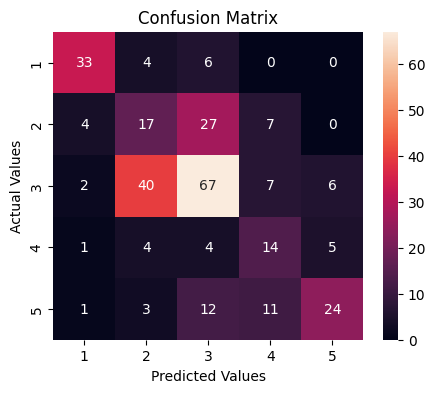

Accuracy of the model is: 0.5183946488294314


In [ ]:
import seaborn as sns
### Feature selection and train/test sets splitting
### X should have all the predictor columns (try with different set of features)
df_features_filtered = df_features.drop(['patient_id', 'nodule_id', 'diagnosis', 'malignancy'], axis=1)
# df_features_filtered = df_features_filtered[['original_firstorder_10Percentile','original_firstorder_90Percentile','original_firstorder_Energy','original_firstorder_Entropy','original_firstorder_InterquartileRange','original_firstorder_Kurtosis','original_firstorder_Maximum','original_firstorder_Mean','original_firstorder_MeanAbsoluteDeviation','original_firstorder_Median','original_firstorder_Minimum','original_firstorder_Range','original_firstorder_RobustMeanAbsoluteDeviation','original_firstorder_RootMeanSquared','original_firstorder_Skewness','original_firstorder_TotalEnergy','original_firstorder_Uniformity','original_firstorder_Variance']]
# df_features_filtered = df_features_filtered.drop(['original_firstorder_10Percentile','original_firstorder_90Percentile','original_firstorder_Energy','original_firstorder_Entropy','original_firstorder_InterquartileRange','original_firstorder_Kurtosis','original_firstorder_Maximum','original_firstorder_Mean','original_firstorder_MeanAbsoluteDeviation','original_firstorder_Median','original_firstorder_Minimum','original_firstorder_Range','original_firstorder_RobustMeanAbsoluteDeviation','original_firstorder_RootMeanSquared','original_firstorder_Skewness','original_firstorder_TotalEnergy','original_firstorder_Uniformity','original_firstorder_Variance'], axis = 1)
X  = df_features_filtered.to_numpy()

### y_<name> should have the predicted column (use either diagnosis or malignancy)
y_diagnosis = df_features["malignancy"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y_diagnosis, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

### random forest test
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### random forest results
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3', '4', '5'],
                     columns = ['1','2','3', '4', '5'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model is: {acc}')
# sensitivity = tp / (tp + fn)
# specificity = tn / (tn + fp)
# print(f'Sensitivity: {sensitivity}')
# print(f'Specificity: {specificity}')

In [ ]:
print('the end')

the end
